In [86]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [87]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [88]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')


In [89]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')



In [90]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')


### Data Preprocessing

**1. Merge observed and estimated training data**

**2. Handle NaN values**
- Look through all features and handle seperately, according to nature of the feature

**3.  Aggregate weather data from every 15 minute to hourly.**
- Average, sum, max/min, first/last etc. depending on the nature of the metric.
- Ensure the timestamps between weather data and power production align.

**4. Handle missing solar power measurements from 2022-10-21 01:00 - 2022-10-28 21:00**

**Merge observed and estimated training data**

In [82]:
def merge_training_data(location):
    if location.lower() == 'a':
        X_train = pd.concat([X_train_observed_a,X_train_estimated_a])
    elif location.lower() == 'b':
        X_train = pd.concat([X_train_observed_b,X_train_estimated_b])
    elif location.lower() == 'c':
        X_train = pd.concat([X_train_observed_c,X_train_estimated_c])
    else:
        raise ValueError(f"Invalid location: {location}")
    return X_train

In [85]:
X_train_a = merge_training_data('a')
X_train_b = merge_training_data('b')
X_train_c = merge_training_data('c')

### Handle NaN values

In [ ]:
##

### Aggregate weather data from every 15 minute to hourly averages

In [151]:
highly_relevant = [
    'clear_sky_rad:W', 
    'direct_rad:W', 
    'direct_rad_1h:J', 
    'diffuse_rad:W', 
    'diffuse_rad_1h:J',
    'effective_cloud_cover:p', 
    'is_day:idx', 
    'is_in_shadow:idx', 
    'sun_elevation:d', 
    'sun_azimuth:d',
    'total_cloud_cover:p',
    'clear_sky_energy_1h:J'
]

moderately_relevant = [
    'fresh_snow_6h:cm'
    'fresh_snow_12h:cm',
    'fresh_snow_24h:cm',
    'ceiling_height_agl:m', 
    'cloud_base_agl:m', 
    'snow_depth:cm', 
    'fresh_snow_1h:cm', 
    'fresh_snow_3h:cm',
    'wind_speed_10m:ms', 
    'wind_speed_u_10m:ms', 
    'wind_speed_v_10m:ms', 
    'visibility:m'
]

less_relevant = [
    'absolute_humidity_2m:gm3', 
    'dew_point_2m:K', 
    'msl_pressure:hPa', 
    'precip_5min:mm', 
    'rain_water:kgm2',
    'sfc_pressure:hPa', 
    'snow_density:kgm3', 
    'snow_melt_10min:mm',
    'air_density_2m:kgm3'
]

not_included = ['elevation:m',
 'pressure_50m:hPa',
 'super_cooled_liquid_water:kgm2',
 'precip_type_5min:idx',
 'dew_or_rime:idx',
 'snow_water:kgm2',
 'prob_rime:p',
 'snow_drift:idx',
 't_1000hPa:K',
 'wind_speed_w_1000hPa:ms',
 'relative_humidity_1000hPa:p',
 'date_calc',
 'pressure_100m:hPa']


#not_included = list(set(X_train_b.columns)-set(highly_relevant) - set(moderately_relevant)-set(less_relevant))


len(highly_relevant)+len(moderately_relevant)+len(less_relevant) + len(not_included)

45

In [141]:
agg_dict1 = {'clear_sky_energy_1h:J': 'sum',
 'diffuse_rad_1h:J': 'sum',
 'direct_rad_1h:J': 'sum',
 'precip_5min:mm': 'sum',
 'fresh_snow_1h:cm': 'sum',
 'fresh_snow_3h:cm': 'sum',
 'snow_melt_10min:mm': 'sum',
 'rain_water:kgm2': 'sum',
 'super_cooled_liquid_water:kgm2': 'sum',
 'wind_speed_10m:ms': 'max',
 'dew_or_rime:idx': 'sum',
 'is_day:idx': 'sum',
 'is_in_shadow:idx': 'sum',
 'snow_drift:idx': 'sum',
 'precip_type_5min:idx': 'sum',
 'absolute_humidity_2m:gm3': 'mean',
 'air_density_2m:kgm3': 'mean',
 'ceiling_height_agl:m': 'mean',
 'clear_sky_rad:W': 'mean',
 'cloud_base_agl:m': 'mean',
 'dew_point_2m:K': 'mean',
 'diffuse_rad:W': 'mean',
 'direct_rad:W': 'mean',
 'effective_cloud_cover:p': 'mean',
 'elevation:m': 'mean',
 'msl_pressure:hPa': 'mean',
 'pressure_100m:hPa': 'mean',
 'pressure_50m:hPa': 'mean',
 'prob_rime:p': 'mean',
 'relative_humidity_1000hPa:p': 'mean',
 'sfc_pressure:hPa': 'mean',
 'snow_density:kgm3': 'mean',
 'snow_depth:cm': 'mean',
 'sun_azimuth:d': 'mean',
 'sun_elevation:d': 'mean',
 't_1000hPa:K': 'mean',
 'total_cloud_cover:p': 'mean',
 'visibility:m': 'mean',
 'wind_speed_u_10m:ms': 'mean',
 'wind_speed_v_10m:ms': 'mean',
 'wind_speed_w_1000hPa:ms': 'mean',
 'fresh_snow_12h:cm': 'last',
 'snow_water:kgm2': 'mean',
 'fresh_snow_24h:cm':'last',
 'fresh_snow_6h:cm':'last'}

agg_dict2 = {
 'absolute_humidity_2m:gm3': 'mean',
 'air_density_2m:kgm3': 'mean',
 'ceiling_height_agl:m': 'mean',
 'clear_sky_energy_1h:J': 'sum',
 'clear_sky_rad:W': 'mean',
 'cloud_base_agl:m': 'mean',
 'dew_or_rime:idx': 'mode',
 'dew_point_2m:K': 'mean',
 'diffuse_rad:W': 'mean',
 'diffuse_rad_1h:J': 'sum',
 'direct_rad:W': 'mean',
 'direct_rad_1h:J': 'sum',
 'effective_cloud_cover:p': 'mean',
 'elevation:m': 'mean',
 'fresh_snow_12h:cm': 'sum',
 'fresh_snow_1h:cm': 'sum',
 'fresh_snow_24h:cm': 'sum',
 'fresh_snow_3h:cm': 'sum',
 'fresh_snow_6h:cm': 'sum',
 'is_day:idx': 'max',
 'is_in_shadow:idx': 'max',
 'msl_pressure:hPa': 'mean',
 'precip_5min:mm': 'sum',
 'precip_type_5min:idx': 'mode',
 'pressure_100m:hPa': 'mean',
 'pressure_50m:hPa': 'mean',
 'prob_rime:p': 'mean',
 'rain_water:kgm2': 'sum',
 'relative_humidity_1000hPa:p': 'mean',
 'sfc_pressure:hPa': 'mean',
 'snow_density:kgm3': 'mean',
 'snow_depth:cm': 'mean',
 'snow_drift:idx': 'mode',
 'snow_melt_10min:mm': 'sum',
 'snow_water:kgm2': 'sum',
 'sun_azimuth:d': 'mean',
 'sun_elevation:d': 'mean',
 'super_cooled_liquid_water:kgm2': 'max',
 't_1000hPa:K': 'mean',
 'total_cloud_cover:p': 'mean',
 'visibility:m': 'mean',
 'wind_speed_10m:ms': 'mean',
 'wind_speed_u_10m:ms': 'mean',
 'wind_speed_v_10m:ms': 'mean',
 'wind_speed_w_1000hPa:ms': 'mean'
}


remaining = list(set(X_train_b.columns) - set(agg_dict2.keys()))


['date_forecast', 'date_calc']

In [153]:
def transform_to_hourly(X,agg_dict):
    return X.resample('H', on = 'date_forecast').agg(agg_dict)

X_train_hourly_b = transform_to_hourly(X_train_b,agg_dict1)

In [154]:
train_b.shape

(32848, 2)

In [175]:
X_train_hourly_b.reset_index()[X_train_hourly_b.reset_index()['date_forecast'].isin(train_b['time'])]

,date_forecast,clear_sky_energy_1h:J,diffuse_rad_1h:J,direct_rad_1h:J,precip_5min:mm,fresh_snow_1h:cm,fresh_snow_3h:cm,snow_melt_10min:mm,rain_water:kgm2,super_cooled_liquid_water:kgm2,wind_speed_10m:ms,dew_or_rime:idx,is_day:idx,is_in_shadow:idx,snow_drift:idx,precip_type_5min:idx,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_rad:W,cloud_base_agl:m,dew_point_2m:K,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,elevation:m,msl_pressure:hPa,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,sun_azimuth:d,sun_elevation:d,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,fresh_snow_12h:cm,snow_water:kgm2,fresh_snow_24h:cm,fresh_snow_6h:cm
0,2019-01-01 00:00:00,0.000000,0.000000,0.000000,0.15,0.0,0.0,0.0,0.0,0.0,3.1,0.0,0.0,4.0,0.0,3.0,5.525,1.23975,1200.675049,0.000,1200.675049,275.149994,0.000,0.0,81.824997,7.0,987.000000,974.099976,980.174988,0.0,89.099998,986.224976,NaN,0.0,20.724251,-48.319252,278.250000,86.324997,16827.800781,1.175,2.550,0.0,0.0,0.050,0.0,0.0
1,2019-01-01 01:00:00,0.000000,0.000000,0.000000,0.05,0.0,0.0,0.0,0.0,0.0,3.7,0.0,0.0,4.0,0.0,1.0,5.425,1.23975,1131.424927,0.000,1131.424927,274.825012,0.000,0.0,97.474998,7.0,986.150024,973.250000,979.325012,0.0,88.425003,985.400024,NaN,0.0,40.307251,-44.919750,278.075012,99.074997,12777.449219,1.525,3.200,0.0,0.0,0.100,0.0,0.0
2,2019-01-01 02:00:00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.4,4.2,0.0,0.0,4.0,0.0,0.0,5.400,1.23850,1061.000000,0.000,1061.000000,274.799988,0.000,0.0,96.425003,7.0,985.950012,973.049988,979.099976,0.0,87.300003,985.174988,NaN,0.0,57.805000,-39.863998,278.049988,97.925003,11140.500000,2.150,3.425,0.0,0.0,0.100,0.0,0.0
3,2019-01-01 03:00:00,0.000000,0.000000,0.000000,0.18,0.0,0.0,0.0,0.0,0.8,5.5,0.0,0.0,4.0,0.0,3.0,5.350,1.23975,1021.150024,0.000,1021.150024,274.674988,0.000,0.0,96.775002,7.0,986.250000,973.349976,979.349976,0.0,88.400002,985.450012,NaN,0.0,73.371002,-33.769001,277.600006,97.224998,6799.200195,3.425,3.500,0.0,0.0,0.100,0.0,0.0
4,2019-01-01 04:00:00,0.000000,0.000000,0.000000,0.06,0.0,0.0,0.0,0.0,0.7,6.2,0.0,0.0,4.0,0.0,1.0,5.675,1.23750,1033.699951,0.000,1033.699951,275.500000,0.000,0.0,96.724998,7.0,986.775024,973.875000,979.900024,0.0,91.275002,985.974976,NaN,0.0,87.514999,-27.167500,277.649994,96.824997,5580.475098,5.575,2.200,0.0,0.0,0.100,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37939,2023-04-30 19:00:00,337850.093750,225735.890625,52978.000000,0.00,0.0,0.0,0.0,0.0,0.0,5.4,0.0,2.0,3.0,0.0,0.0,4.550,1.27650,1677.949951,4.225,542.849976,272.424988,2.825,0.1,96.724998,7.0,1014.750000,1001.450012,1007.674988,0.0,74.625000,1013.950012,NaN,0.0,304.940247,-0.180500,275.024994,96.724998,23434.074219,4.800,1.925,0.0,0.0,0.000,0.0,0.0
37940,2023-04-30 20:00:00,9083.099609,20268.099609,706.599976,0.00,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,4.0,0.0,0.0,4.500,1.27875,1766.500000,0.000,546.349976,272.299988,0.000,0.0,94.224998,7.0,1014.750000,1001.450012,1007.674988,0.0,76.849998,1013.950012,NaN,0.0,318.626251,-5.175750,274.650024,94.525002,21307.724609,4.025,2.300,0.0,0.0,0.000,0.0,0.0
37941,2023-04-30 21:00:00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,4.0,0.0,0.0,4.500,1.27900,1698.925049,0.000,548.049988,272.299988,0.000,0.0,94.324997,7.0,1014.574951,1001.299988,1007.525024,0.0,77.775002,1013.799988,NaN,0.0,332.786255,-8.950750,274.524994,95.650002,21159.224609,3.600,2.600,0.0,0.0,0.000,0.0,0.0
37942,2023-04-30 22:00:00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.4,4.3,0.0,0.0,4.0,0.0,0.0,4.500,1.27975,1354.824951,0.000,527.599976,272.274994,0.000,0.0,97.750000,7.0,1014.450012,1001.125000,1007.375000,0.0,79.000000,1013.674988,NaN,0.0,347.378479,-11.233250,274.325012,98.875000,14371.775391

### Handle missing solar power measurements from 2022-10-21 01:00 - 2022-10-28 21:00

In [178]:
train_b.shape

(32848, 2)

In [176]:
X_train_b_hourly_mod = X_train_hourly_b.reset_index()[X_train_hourly_b.reset_index()['date_forecast'].isin(train_b['time'])]
X_train_b_hourly_mod.shape


(32847, 46)

# Exploratory Data Analysis

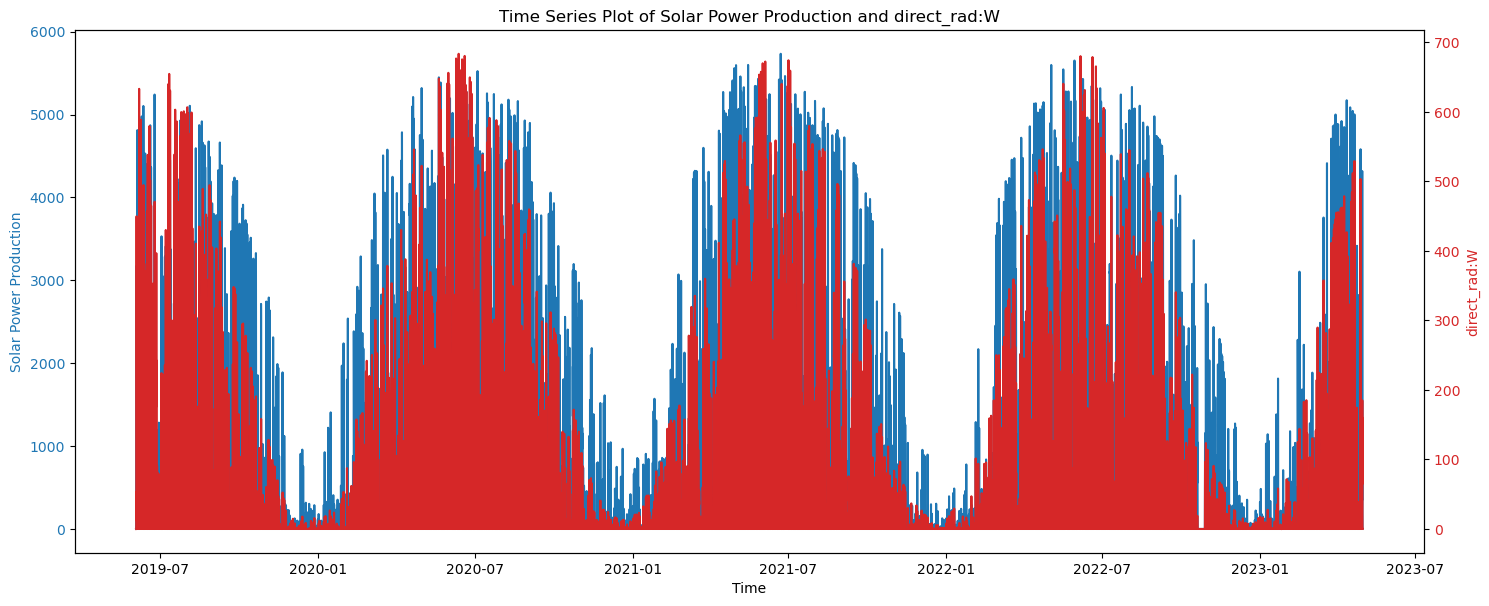

In [61]:
#Time series plot of feature vs production
def time_series_plot(feature):
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Solar Power Production', color='tab:blue')
    ax1.plot(train_a['time'], train_a['pv_measurement'], color='tab:blue', label='Solar Power Production')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  
    ax2.set_ylabel(feature, color='tab:red')  
    ax2.plot(X_train_a_hourly_mod['date_forecast'], X_train_a_hourly_mod[feature], color='tab:red', label=feature)
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title(f'Time Series Plot of Solar Power Production and {feature}')
    plt.show()

time_series_plot('direct_rad:W')

In [ ]:
#Correlation Heatmap 


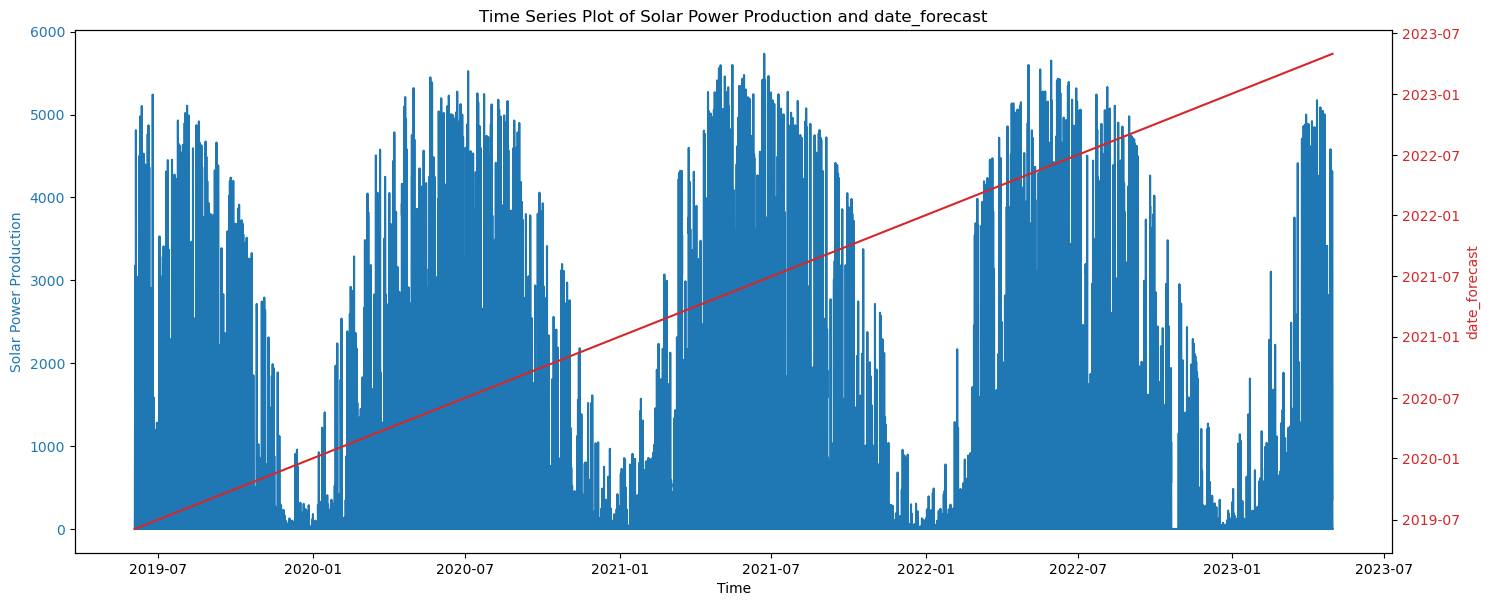

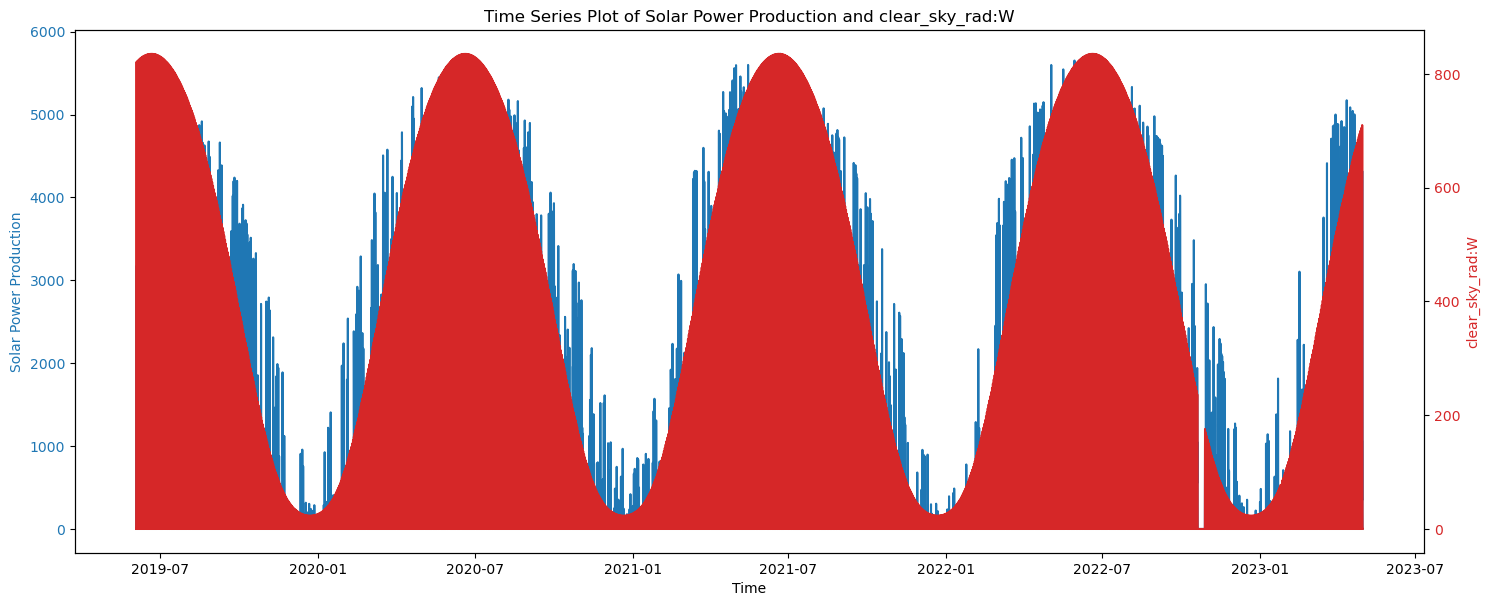

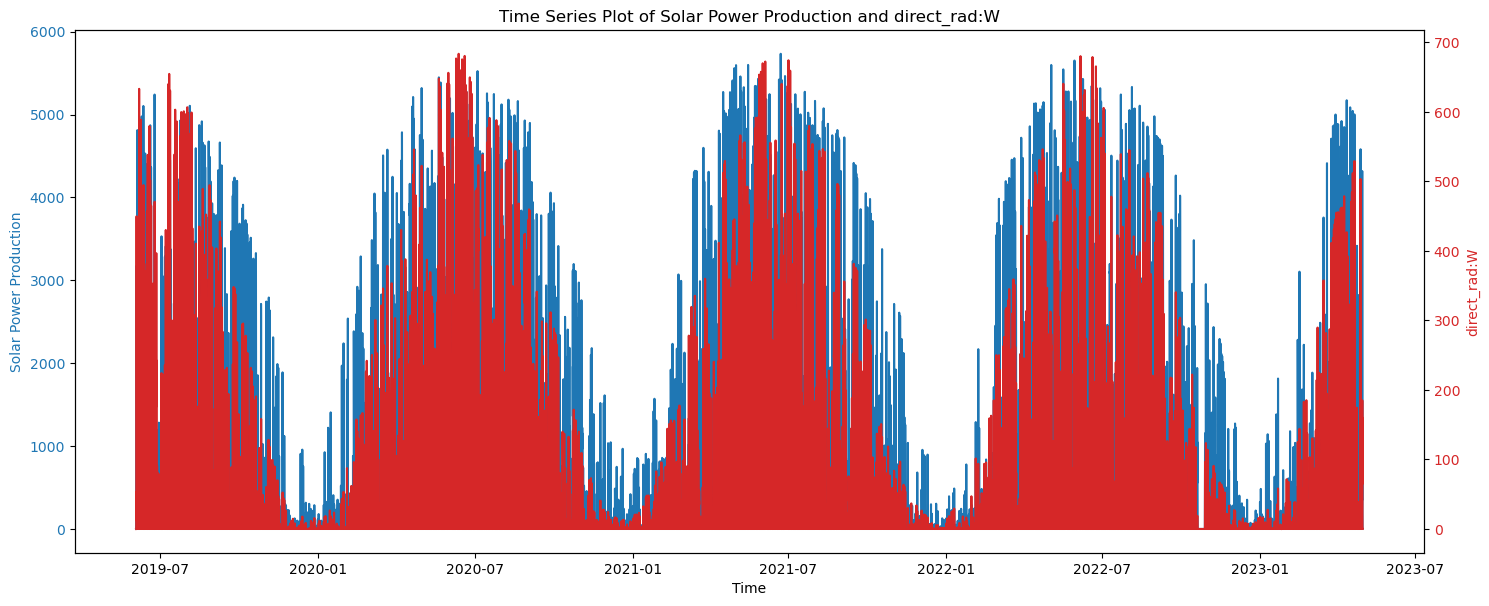

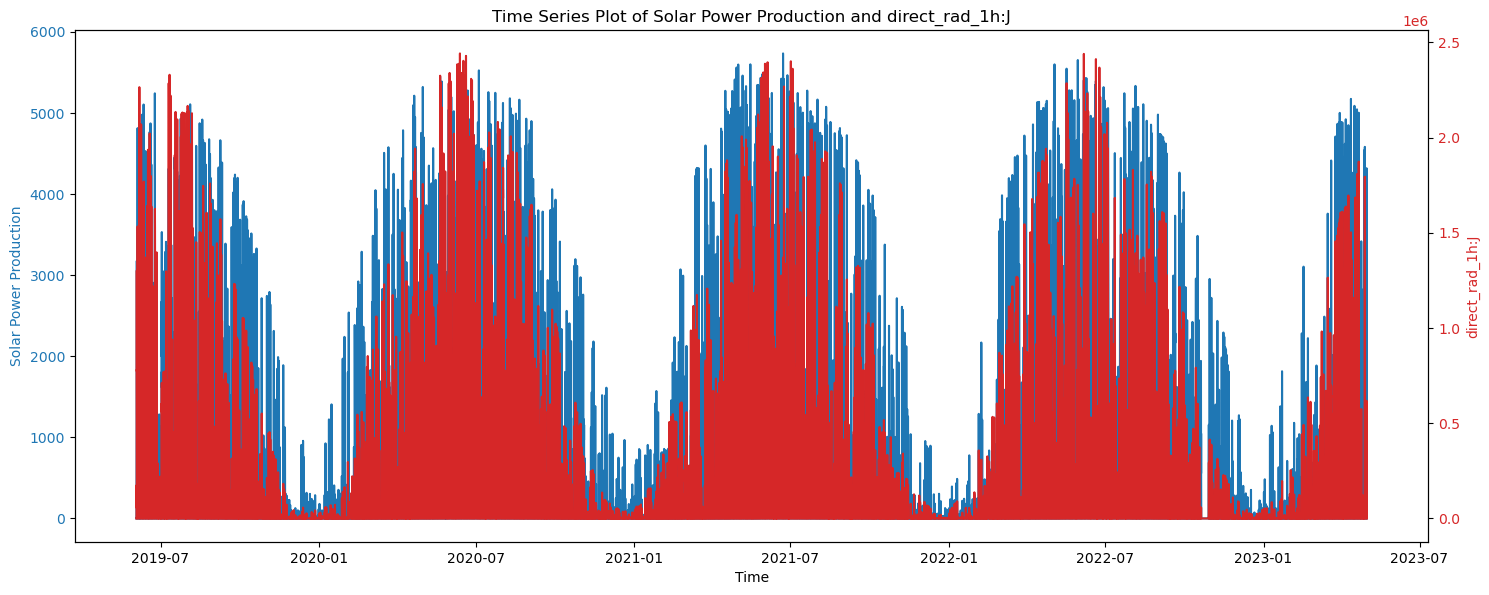

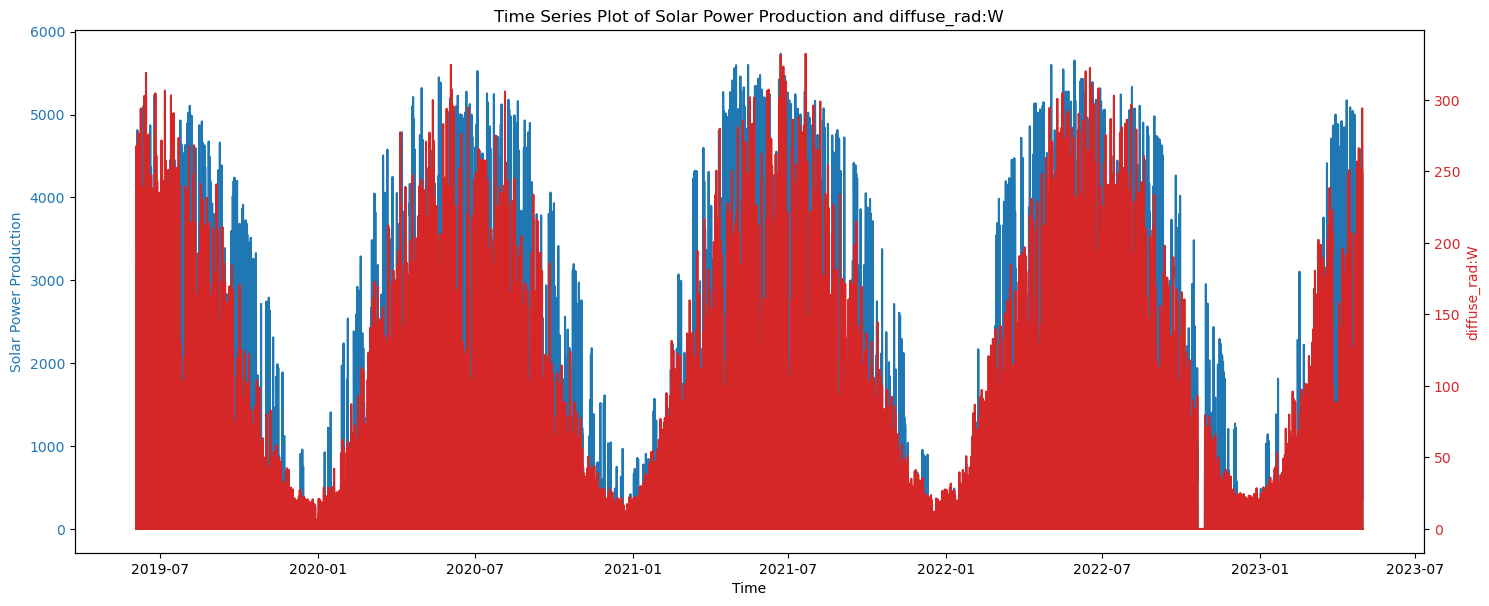

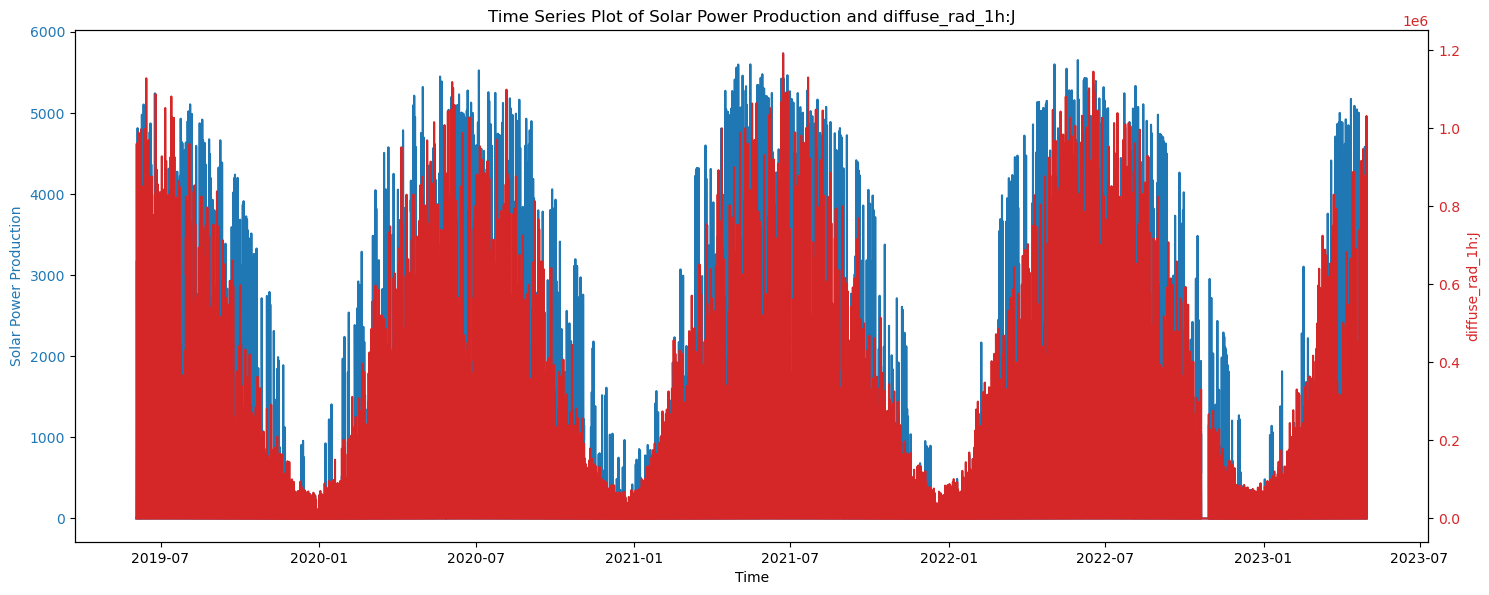

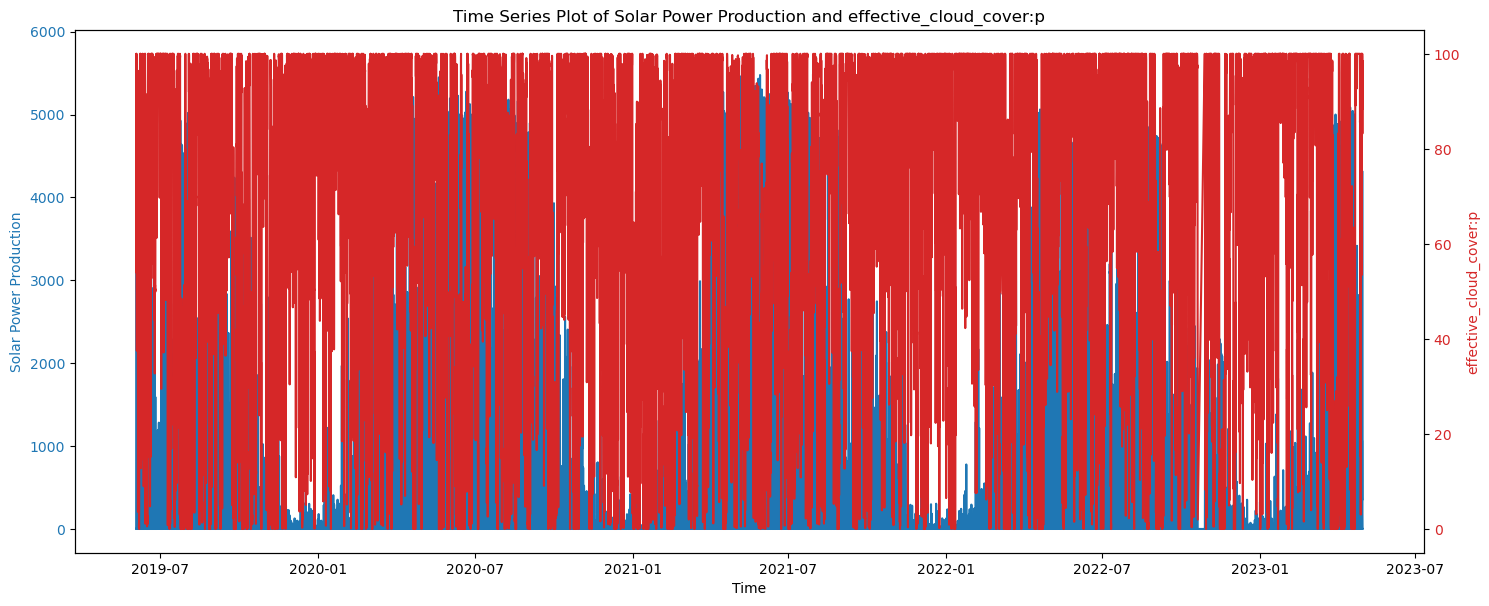

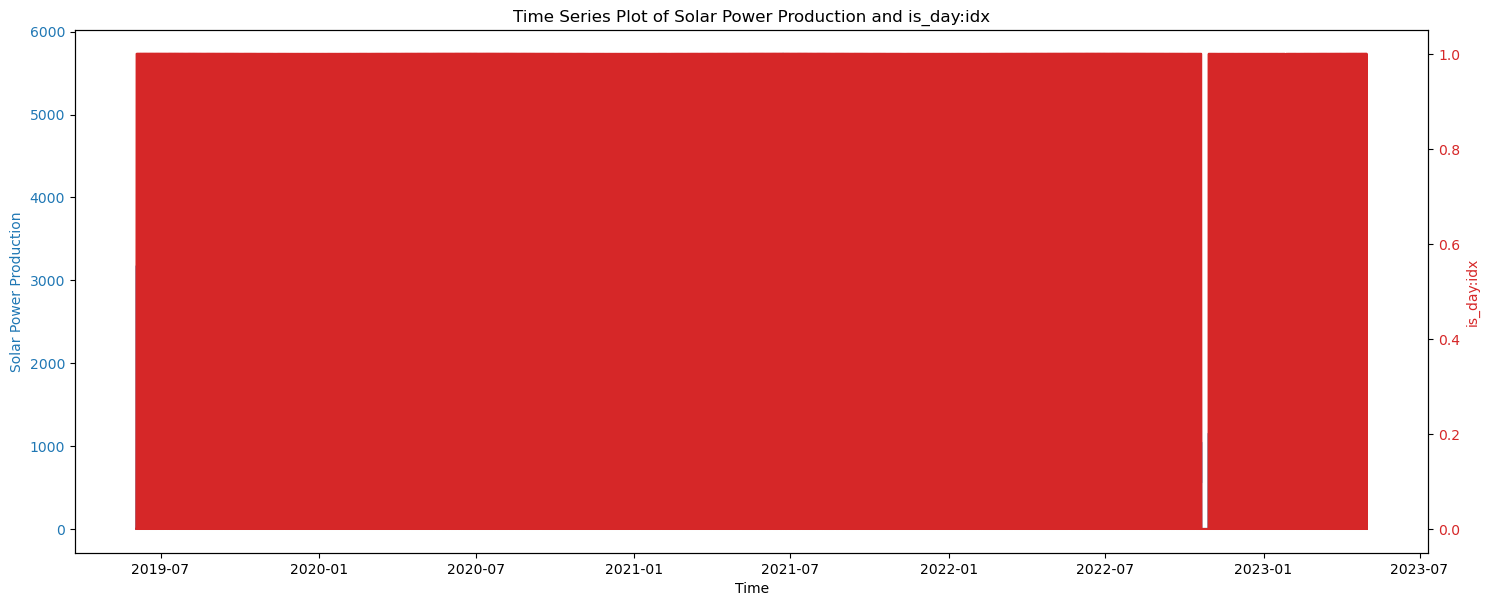

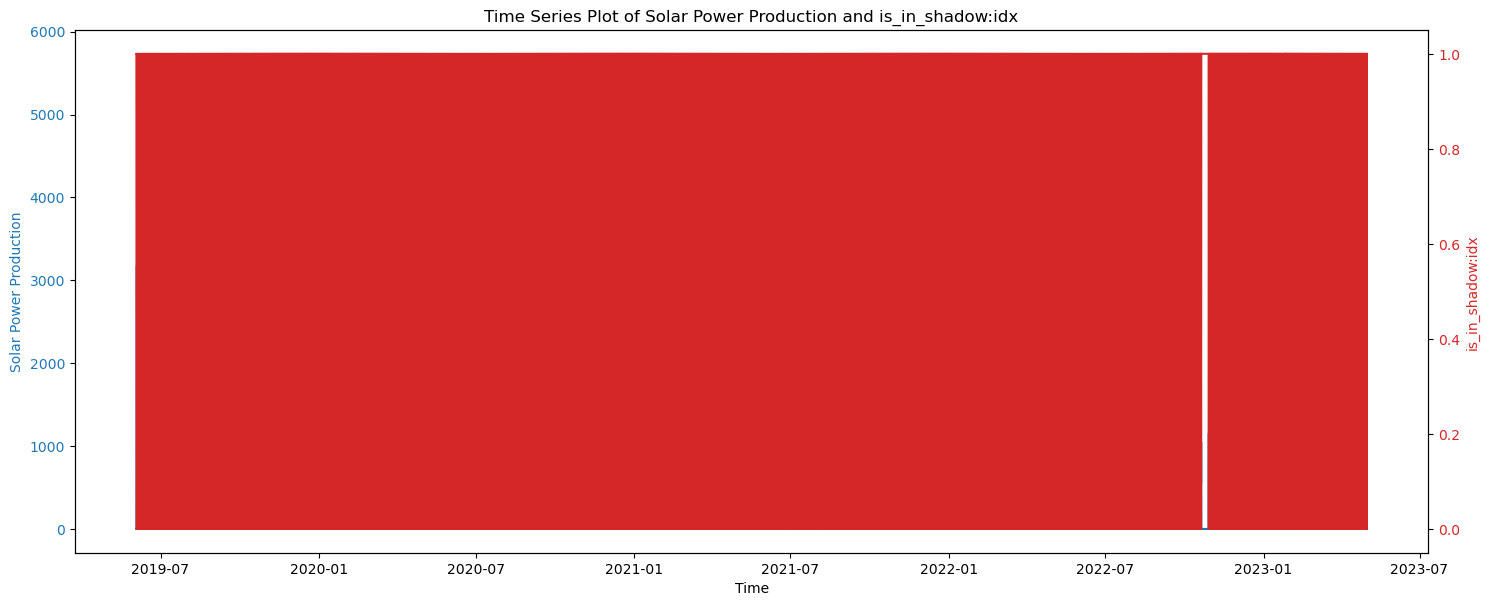

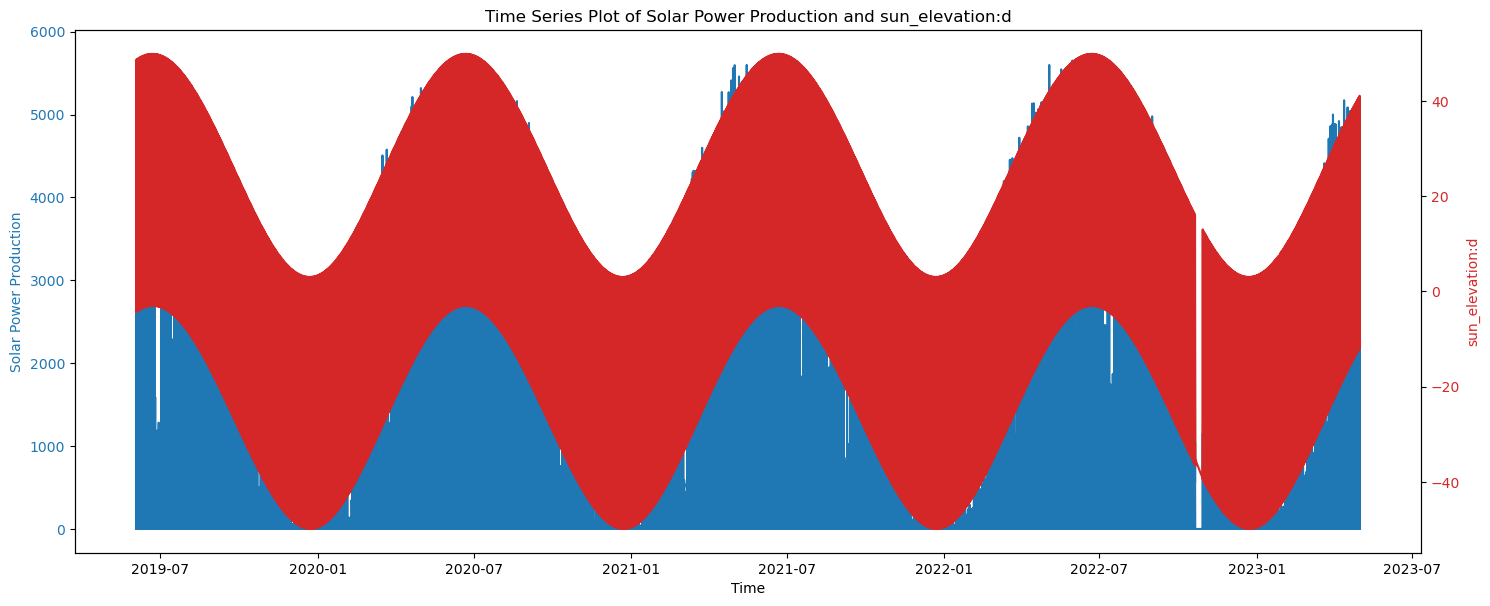

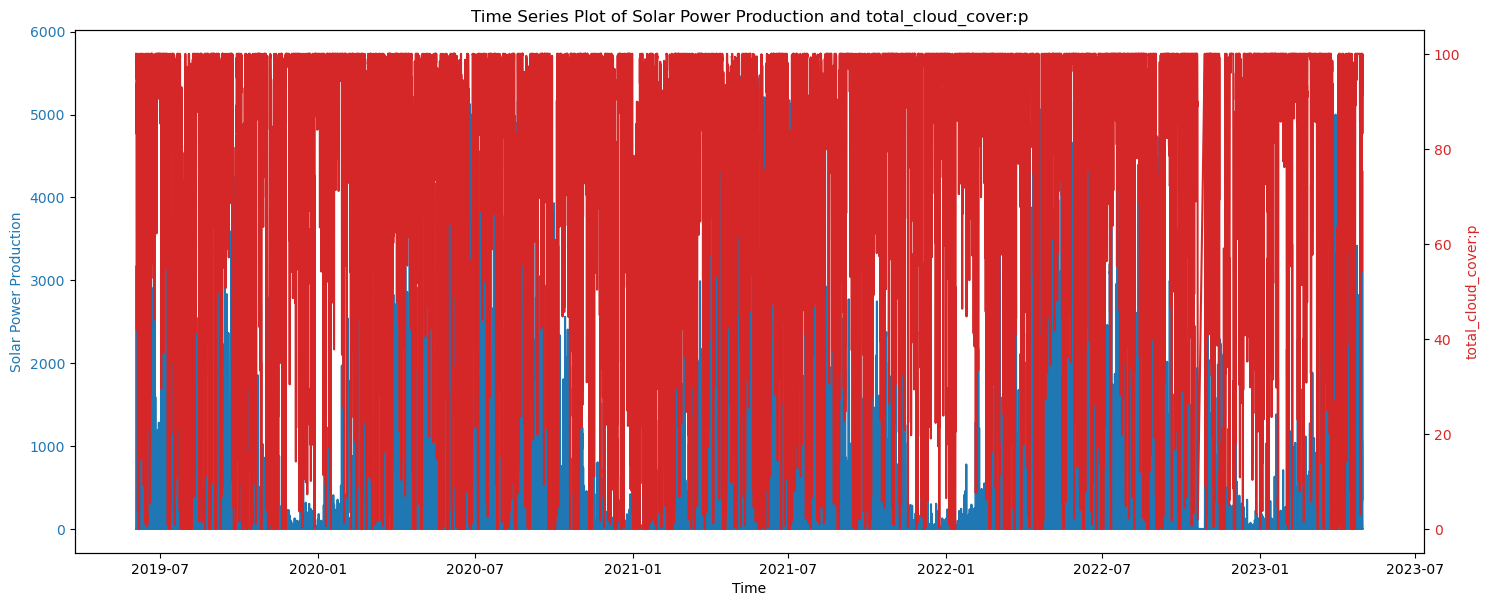

In [63]:
for feat in highly_relevant:
    time_series_plot(feat)

**Aggregating 15 minute frequency to hourly for location A on the most relevant features**

In [14]:
highly_relevant = ['date_forecast','clear_sky_rad:W', 'direct_rad:W', 'direct_rad_1h:J', 'diffuse_rad:W', 'diffuse_rad_1h:J',
                   'effective_cloud_cover:p', 'is_day:idx', 'is_in_shadow:idx', 'sun_elevation:d', 'total_cloud_cover:p']

moderately_relevant = ['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_depth:cm', 'fresh_snow_1h:cm', 'fresh_snow_3h:cm',
                       'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'visibility:m']



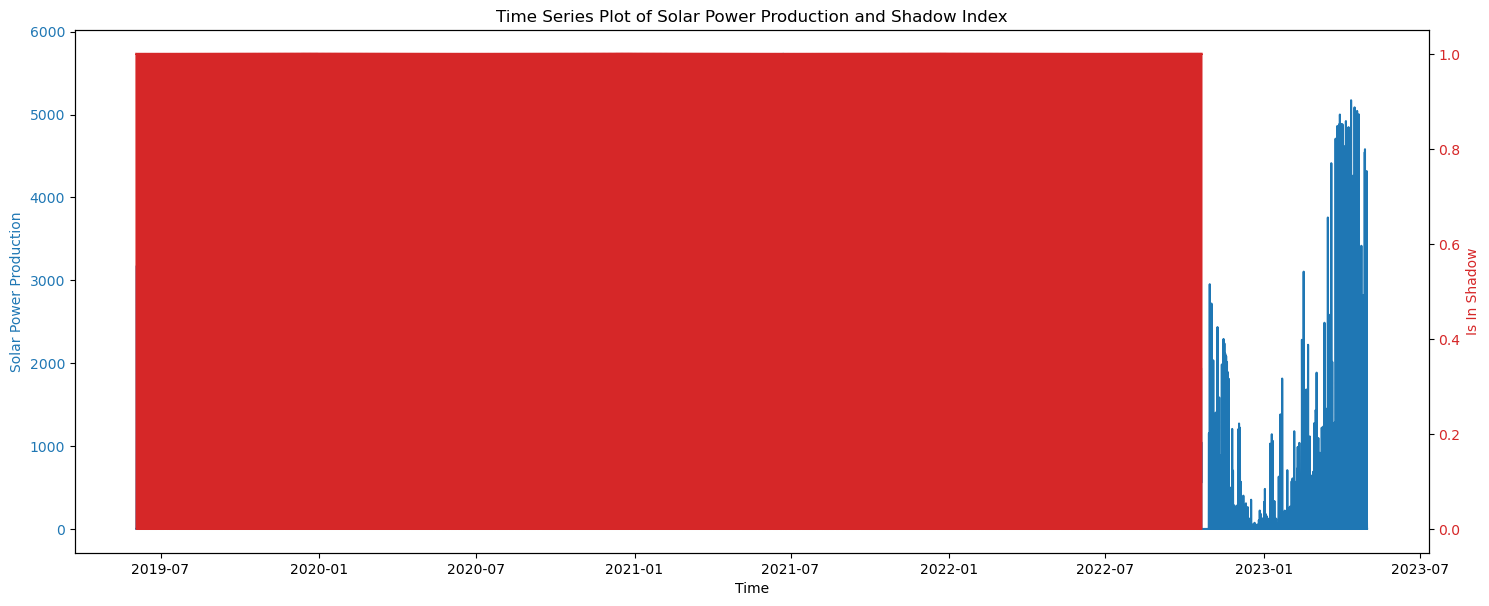

In [26]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('Solar Power Production', color='tab:blue')
ax1.plot(train_a['time'], train_a['pv_measurement'], color='tab:blue', label='Solar Power Production')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Is In Shadow', color='tab:red')  
ax2.plot(X_train_OA.resample('H', on = 'date_forecast').sum()['date_forecast'], X_train_OA['is_in_shadow:idx'], color='tab:red', label='Is In Shadow')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Time Series Plot of Solar Power Production and Shadow Index')
plt.show()